In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as ss
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('MOCK_DATA.csv')
data = df.Production18 #replace X with your designated number on the exam sheet

In [5]:
data

0      536
1      477
2      416
3      565
4      502
5      453
6      471
7      513
8      520
9      490
10     551
11     490
12     524
13     476
14     507
15     593
16     520
17     565
18     570
19     522
20     526
21     508
22     511
23     533
24     526
25     507
26     513
27     547
28     505
29     486
      ... 
970    506
971    489
972    552
973    534
974    506
975    509
976    505
977    573
978    510
979    526
980    521
981    546
982    482
983    524
984    534
985    524
986    514
987    542
988    551
989    528
990    560
991    545
992    538
993    534
994    472
995    554
996    565
997    552
998    567
999    500
Name: Production18, Length: 1000, dtype: int64

In [6]:
X = np.array(data)

In [7]:
X_ave = np.average(X)
print('The Average is:', X_ave)

The Average is: 517.632


In [8]:
s_2 = np.var(X, ddof = 1)
print('The Variance of the Sample is:' ,s_2)

The Variance of the Sample is: 903.367943944


In [9]:
s = np.std(X, ddof = 1)
print('The Standard Deviation of the sample is:', s)

The Standard Deviation of the sample is: 30.056079983


In [10]:
median = np.median(X)
print('The median of the sample is:', median)

The median of the sample is: 518.0


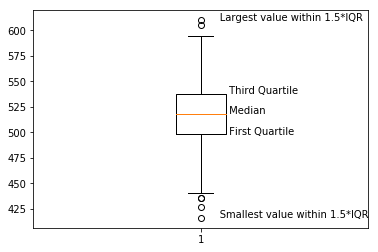

In [11]:
plt.boxplot(X)
plt.annotate('      Largest value within 1.5*IQR',[1,np.max(X)])
plt.annotate('         Third Quartile',[1,np.percentile(X, 75)])
plt.annotate('         First Quartile',[1,np.percentile(X, 25)])
plt.annotate('         Median',[1,np.median(X)])
plt.annotate('      Smallest value within 1.5*IQR',[1,np.min(X)])
plt.show()

In [12]:
X_outliers = np.append(X,50)

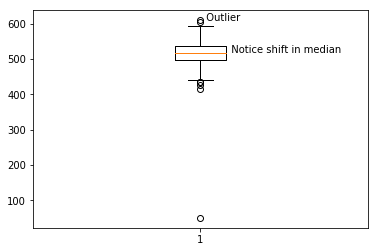

In [13]:
plt.boxplot(X_outliers)
plt.annotate('  Outlier',[1,np.max(X_outliers)])
plt.annotate('          Notice shift in median',[1,np.median(X_outliers)])
plt.show()

In [14]:
## Probability

In [17]:
n = 9
k = 3
perms = np.math.factorial(n)
perms = np.math.factorial(n)/np.math.factorial(n-k)
print('There are', perms, 'different ways that', n, 'wells can be split into', k, 'top producing wells.')

There are 504.0 different ways that 9 wells can be split into 3 top producing wells.


In [19]:
combs = np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(n-k))
print('There are', combs, 'combinations of', k, 'wells chosen from', n, 'wells.')

There are 84.0 combinations of 3 wells chosen from 9 wells.


In [33]:
prob = 100*k/n
print('There is a', prob, '% chance of picking the Worst producing Well out of', n, 'Wells.')

There is a 33.333333333333336 % chance of picking the Worst producing Well out of 9 Wells.


In [34]:
prob = 100*k/n
print('There is a', prob, '% probability of picking a gas well out of 3 gas wells and 6 oil wells.')

There is a 33.333333333333336 % probability of picking a gas well out of 3 gas wells and 6 oil wells.


In [36]:
## Confidence Intervals

In [37]:
n = 120
X = 8.3
sd = 0.4
ss.norm.interval(.95, loc=X, scale=sd/np.sqrt(n))

(8.228432234251315, 8.3715677657486864)

In [38]:
ss.norm.interval(.99, loc=X, scale=sd/np.sqrt(n))

(8.2059440124108978, 8.3940559875891037)

In [41]:
ci = 8.57
z_sig = ci - X
z = z_sig*np.sqrt(n)/sd
1-(1-ss.norm.cdf(z))*2

0.99999999999985789

In [42]:
z_sig = 0.07
z = ss.norm.ppf(.975) 
n = (z*sd/z_sig)**2
print(np.ceil(n)) 

126.0


In [43]:
z = ss.norm.ppf(.995) 
n = (z*sd/z_sig)**2
print(np.ceil(n)) 


217.0


In [44]:
n = 80
X = 42

def binom_CI(n,X,alpha):
    n_hat = n+4
    p_hat = (X+2) / n_hat
    
    z = ss.norm.ppf(1-alpha/2)
    
    ci = z*np.sqrt(p_hat*(1-p_hat)/n_hat)

    return np.array([p_hat-ci, p_hat+ci])


alpha = 1 - 0.95
binom_CI(n,X,alpha)

array([ 0.41700602,  0.63061303])

In [45]:
alpha = 1 - 0.9
binom_CI(n,X,alpha)

array([ 0.4341772 ,  0.61344185])

In [46]:
## Confidence Intervals/Hypothesis Testing

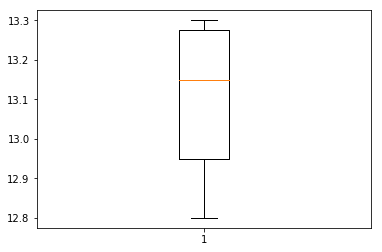

In [47]:
X = np.array([13.1,13.3,12.9,12.8,13.2,13.3])
plt.boxplot(X)
plt.show()

In [48]:
n = len(X)
mean = np.mean(X)
sd = np.std(X)
df = n-1
alpha = 0.95
ss.t.interval(alpha, df, mean, ss.sem(X))

(12.879868522974609, 13.32013147702539)